In [7]:
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
import icechunk

ds_dict = {}
setups = ['prod', 'staging']  #'qa']
for setup in setups:
    storage = icechunk.s3_storage(
        bucket='carbonplan-ocr',
        prefix=f'output/fire-risk/tensor/{setup}/template.icechunk',
        from_env=True,
    )
    repo = icechunk.Repository.open(storage)
    session = repo.readonly_session('main')

    ds_dict[setup] = xr.open_zarr(session.store, consolidated=False, zarr_format=3)

In [5]:
lon_slice = slice(-120.69, -120.61)
lat_slice = slice(47.61, 47.57)

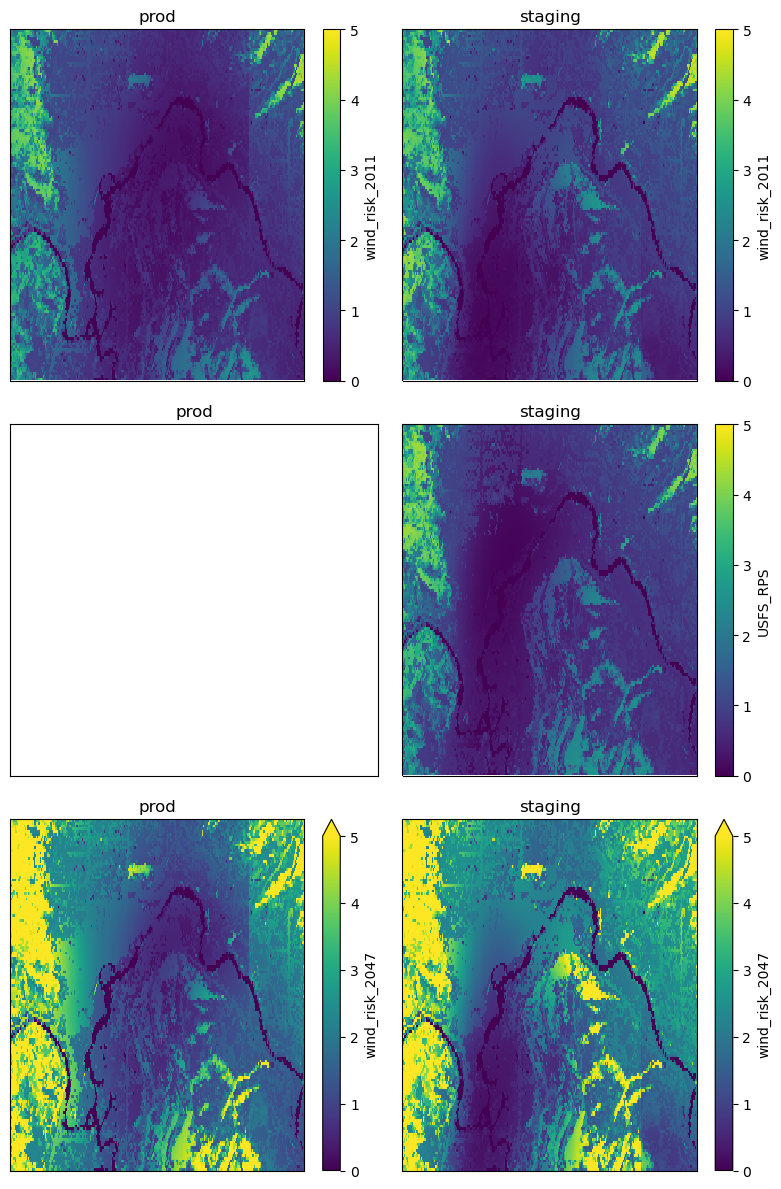

In [9]:
fig, axarr = plt.subplots(ncols=len(setups), nrows=3, figsize=(8, 12))
for i, (setup, ds) in enumerate(ds_dict.items()):  # , 'qa']:
    ds.sel(latitude=lat_slice, longitude=lon_slice).wind_risk_2011.plot(
        ax=axarr[0, i], vmin=0, vmax=5
    )
    axarr[0, i].set_title(setup)
    if setup == 'staging':
        ds.sel(latitude=lat_slice, longitude=lon_slice).USFS_RPS.plot(
            ax=axarr[1, i], vmin=0, vmax=5
        )
        axarr[1, i].set_title(setup)
    ds.sel(latitude=lat_slice, longitude=lon_slice).wind_risk_2047.plot(
        ax=axarr[2, i], vmin=0, vmax=5
    )
    axarr[1, i].set_title(setup)
    axarr[2, i].set_title(setup)
for ax in axarr.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')
plt.tight_layout()